# Parameter recovery of the DDM with starting point bias

In [1]:
import rlssm
import pandas as pd

## Simulate individual data

In [2]:
from rlssm.random import simulate_ddm

In [3]:
data = simulate_ddm(
    n_trials=400, 
    gen_drift=.8, 
    gen_threshold=1.3, 
    gen_ndt=.23, 
    gen_rel_sp=.6)

In [4]:
data.describe()[['rt', 'accuracy']]

,rt,accuracy
count,400.000000,400.00000
mean,0.583140,0.81750
std,0.296395,0.38674
min,0.257000,0.00000
25%,0.366000,1.00000
50%,0.493500,1.00000
75%,0.706500,1.00000
max,1.916000,1.00000


## Initialize the model

In [5]:
model = rlssm.DDModel(hierarchical_levels = 1, starting_point_bias=True)

Using cached StanModel


## Fit

In [6]:
# sampling parameters
n_iter = 3000
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu':1, 'sd':3}
threshold_priors = {'mu':-1, 'sd':3}
ndt_priors = {'mu':-1, 'sd':1}

In [7]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 3}
threshold_priors {'mu': -1, 'sd': 3}
ndt_priors {'mu': -1, 'sd': 1}
rel_sp_priors {'mu': 0, 'sd': 0.8}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 3000 iterations ended with a divergence (0.0%)
0 of 3000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [8]:
model_fit.rhat

,rhat,variable
0,1.002813,drift
1,1.000353,threshold
2,0.999921,ndt
3,1.003156,rel_sp


### calculate wAIC

In [9]:
model_fit.waic

{'lppd': -122.26126045695726,
 'p_waic': 3.682425753566376,
 'waic': 251.88737242104727,
 'waic_se': 47.269086540763105}

## Posteriors

In [10]:
model_fit.samples.describe()

,chain,draw,transf_drift,transf_threshold,transf_ndt,transf_rel_sp
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500000,749.500000,0.792928,1.306639,0.233079,0.604580
std,0.500083,433.084792,0.103006,0.033952,0.004736,0.019013
min,0.000000,0.000000,0.338697,1.204520,0.214251,0.537698
25%,0.000000,374.750000,0.721867,1.283811,0.230113,0.591341
50%,0.500000,749.500000,0.793180,1.306182,0.233424,0.604716
75%,1.000000,1124.250000,0.863523,1.329765,0.236436,0.617648
max,1.000000,1499.000000,1.242643,1.431171,0.247481,0.668216


In [11]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

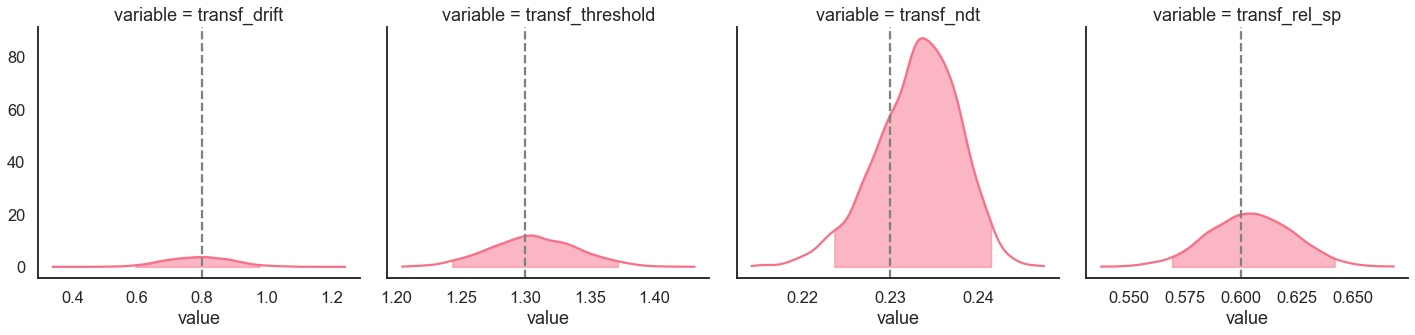

In [12]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')